<h1>Age detection</h1>

In [1]:
import cv2
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

<h2>UTKFace dataset</h2>

The source of the dataset: https://www.kaggle.com/datasets/jangedoo/utkface-new

In [2]:
images=[]
ages=[]
agegroups=[]
agesstr=[]
genders=[]
gendersstr=[]

folder = "C:/Users/gyory/Documents/Diplomamunka/Adathalmazok/UTKFace/UTKFace"
for filename in os.listdir(folder):
    split =filename.split('_')
    ages.append(int(split[0]))
    if int(split[0]) < 12:
        agesstr.append('gyerek')
        agegroups.append('0')
    elif int(split[0]) < 30:
        agesstr.append('fiatal')
        agegroups.append('1')
    elif int(split[0]) < 60:
        agesstr.append('középkorú')
        agegroups.append('2')
    else:
        agesstr.append('idős')
        agegroups.append('3')

        
    genders.append(int(split[1]))
    if int(split[1]) == 0:
        gendersstr.append('male')
    else:
        gendersstr.append('female')
    images.append(filename)

    ages.append(int(split[0]))
    if int(split[0]) < 10:
        agesstr.append('0-9')
    elif int(split[0]) < 18:
        agesstr.append('10-18')
    elif int(split[0]) < 30:
        agesstr.append('19-29')
    elif int(split[0]) < 50:
        agesstr.append('30-49')
    elif int(split[0]) < 65:
        agesstr.append('50-64')
    else:
        agesstr.append('65+')

In [3]:
images=pd.Series(images,name='Filename')
ages=pd.Series(ages,name='Age')
agegroups=pd.Series(agegroups,name='Age_groups')
agesstr=pd.Series(agesstr,name='Ages_str')
genders=pd.Series(genders,name='Gender')
gendersstr=pd.Series(gendersstr,name='Gender_str')
df=pd.concat([images,ages,agegroups,agesstr,genders,gendersstr],axis=1)
df.head(20)

,Filename,Age,Age_groups,Ages_str,Gender,Gender_str
0,100_0_0_20170112213500903.jpg.chip.jpg,100,3,idős,0,male
1,100_0_0_20170112215240346.jpg.chip.jpg,100,3,idős,0,male
2,100_1_0_20170110183726390.jpg.chip.jpg,100,3,idős,1,female
3,100_1_0_20170112213001988.jpg.chip.jpg,100,3,idős,1,female
4,100_1_0_20170112213303693.jpg.chip.jpg,100,3,idős,1,female
5,100_1_0_20170112215032192.jpg.chip.jpg,100,3,idős,1,female
6,100_1_0_20170117195420803.jpg.chip.jpg,100,3,idős,1,female
7,100_1_0_20170119212053665.jpg.chip.jpg,100,3,idős,1,female
8,100_1_2_20170105174847679.jpg.chip.jpg,100,3,idős,1,female
9,100_1_2_20170112213615815.jpg.chip.jpg,100,3,idős,1,female


Text(0.5, 1.0, 'Kor szerinti eloszlás kategóriánként')

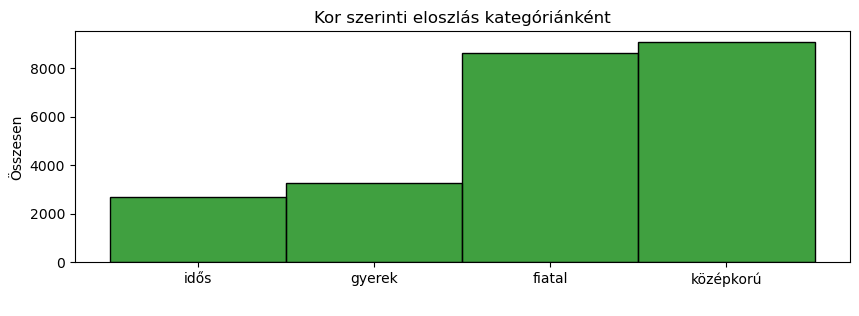

In [4]:
plt.figure(figsize=(10,3))


bins = np.linspace(0, 120, 13)
ax = sns.histplot(df['Ages_str'], bins=bins, color="green");

ax.set(xlabel=" ", ylabel="Összesen")
plt.title("Kor szerinti eloszlás kategóriánként")

<h2>KOR</h2>

In [5]:
from sklearn.model_selection import train_test_split

#validation

images_data = df['Filename']
labels_data = df['Age_groups'] 
train1_images, val_images, train1_labels, val_labels = train_test_split(images_data, labels_data, test_size=0.2, shuffle=True)
#train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.4, shuffle=True)

In [6]:
d = {'filename':train1_images,'ages':train1_labels}
train_1 = pd.concat(d,axis=1)
train_1

,filename,ages
1232,18_0_0_20170117175618980.jpg.chip.jpg,1
20101,59_0_0_20170111203716454.jpg.chip.jpg,2
16206,42_1_0_20170117172734743.jpg.chip.jpg,2
19869,58_0_0_20170113210319462.jpg.chip.jpg,2
3557,22_1_2_20170104021310052.jpg.chip.jpg,1
...,...,...
7349,26_1_2_20170116175333732.jpg.chip.jpg,1
945,16_1_0_20170104013543170.jpg.chip.jpg,1
15439,40_0_0_20170117135733872.jpg.chip.jpg,2
13653,35_1_3_20170119163902152.jpg.chip.jpg,2


In [7]:
d = {'filename':val_images,'ages':val_labels}
val = pd.concat(d,axis=1)
val

,filename,ages
10260,2_1_0_20161219154620268.jpg.chip.jpg,0
17969,50_0_0_20170120134018751.jpg.chip.jpg,2
7338,26_1_2_20170116163008149.jpg.chip.jpg,1
20293,5_1_2_20161219151834275.jpg.chip.jpg,0
19843,58_0_0_20170111195225616.jpg.chip.jpg,2
...,...,...
5869,26_0_0_20170117091532995.jpg.chip.jpg,1
14150,36_1_3_20170119202143325.jpg.chip.jpg,2
13248,35_0_3_20170117182941262.jpg.chip.jpg,2
11683,32_0_0_20170117173304428.jpg.chip.jpg,2


In [8]:
#train, test

images2_data = train_1.filename
labels2_data = train_1.ages #0 férfi, 1 nő
train_images, test_images, train_labels, test_labels = train_test_split(images2_data, labels2_data, test_size=0.2, shuffle=True)

In [9]:
d = {'filename':train_images,'ages':train_labels}
train = pd.concat(d,axis=1)
train

,filename,ages
179,110_1_3_20170110155139762.jpg.chip.jpg,3
1932,1_0_2_20161219205717701.jpg.chip.jpg,0
11618,32_0_0_20170116180259328.jpg.chip.jpg,2
10071,2_0_0_20170110213208884.jpg.chip.jpg,0
8795,28_0_1_20170117020634195.jpg.chip.jpg,1
...,...,...
22087,73_0_0_20170111211426693.jpg.chip.jpg,3
5434,25_1_1_20170112205209506.jpg.chip.jpg,1
5598,25_1_3_20170104231514978.jpg.chip.jpg,1
22091,73_0_0_20170116221650300.jpg.chip.jpg,3


In [10]:
d = {'filename':test_images,'ages':test_labels}
test = pd.concat(d,axis=1)
test

,filename,ages
20819,62_0_0_20170111200703518.jpg.chip.jpg,3
9100,28_1_0_20170117122004211.jpg.chip.jpg,1
19917,58_0_0_20170120222805833.jpg.chip.jpg,2
9306,28_1_2_20170116165117020.jpg.chip.jpg,1
4617,24_1_1_20170116222611638.jpg.chip.jpg,1
...,...,...
15937,41_0_3_20170119175402515.jpg.chip.jpg,2
4599,24_1_1_20170115235617909.jpg.chip.jpg,1
17706,4_1_0_20170109191135825.jpg.chip.jpg,0
1108,17_0_3_20170104225734512.jpg.chip.jpg,1


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
batch = 32
img_height = 200
img_width = 200

In [13]:
train_gen = ImageDataGenerator(#rotation_range=45,
                               rescale=1./255#,
                               #horizontal_flip=True
)
test_gen = ImageDataGenerator(rescale = 1./255)

In [14]:
train_data = train_gen.flow_from_dataframe(dataframe = train, 
                                           directory = folder, 
                                           x_col = 'filename',
                                           y_col = 'ages', seed = 42,
                                           batch_size = batch,
                                           shuffle = True, 
                                           class_mode="categorical",
                                           target_size = (img_height,img_width))

Found 15172 validated image filenames belonging to 4 classes.


In [15]:
test_data = test_gen.flow_from_dataframe(dataframe = test, 
                                           directory = folder, 
                                           x_col = 'filename',
                                           y_col = 'ages', seed = 42,
                                           batch_size = batch,
                                           shuffle = True, 
                                           class_mode="categorical",
                                           target_size = (img_height,img_width))

Found 3794 validated image filenames belonging to 4 classes.


In [16]:
val_data = train_gen.flow_from_dataframe(dataframe = val, 
                                           directory = folder, 
                                           x_col = 'filename',
                                           y_col = 'ages', seed = 42,
                                           batch_size = batch,
                                           shuffle = True, 
                                           class_mode="categorical",
                                           target_size = (img_height,img_width))

Found 4742 validated image filenames belonging to 4 classes.


In [17]:
from keras import models
import tensorflow as tf
from tensorflow.keras import layers

In [18]:
network_ages1 = models.Sequential()
#network.add(layers.experimental.preprocessing.Rescaling(1./255))
network_ages1.add(layers.Conv2D(36, kernel_size=3, activation='relu', input_shape=(200, 200, 3)))
network_ages1.add(layers.AvgPool2D(pool_size=3, strides=2))
network_ages1.add(layers.Conv2D(64, kernel_size=3, activation='relu'))
network_ages1.add(layers.AvgPool2D(pool_size=3, strides=2))
network_ages1.add(layers.Conv2D(128, kernel_size=3, activation='relu'))
network_ages1.add(layers.AvgPool2D(pool_size=3, strides=2))
network_ages1.add(layers.Conv2D(256, kernel_size=3, activation='relu'))
network_ages1.add(layers.AvgPool2D(pool_size=3, strides=2))
network_ages1.add(layers.Flatten())
network_ages1.add(layers.Dropout(0.5))
network_ages1.add(layers.Dense(128, activation='relu'))
network_ages1.add(layers.Dense(4, activation='softmax'))

In [19]:
network_ages1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [20]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)

In [21]:
history_ages1 = network_ages1.fit(
    train_data,
    validation_data=val_data,
    epochs= 10,
    callbacks = callback,
    shuffle=True
)
eff_epochs = len(history_ages1.history['loss'])

Epoch 1/10
475/475 [==============================] - 491s 1s/step - loss: 1.0445 - accuracy: 0.5263 - val_loss: 0.8561 - val_accuracy: 0.6063
Epoch 2/10
475/475 [==============================] - 505s 1s/step - loss: 0.8374 - accuracy: 0.6233 - val_loss: 0.7847 - val_accuracy: 0.6375
Epoch 3/10
475/475 [==============================] - 498s 1s/step - loss: 0.7866 - accuracy: 0.6488 - val_loss: 0.7895 - val_accuracy: 0.6464
Epoch 4/10
475/475 [==============================] - 502s 1s/step - loss: 0.7308 - accuracy: 0.6772 - val_loss: 0.6928 - val_accuracy: 0.6892
Epoch 5/10
475/475 [==============================] - 503s 1s/step - loss: 0.6949 - accuracy: 0.6929 - val_loss: 0.6969 - val_accuracy: 0.6953
Epoch 6/10
475/475 [==============================] - 501s 1s/step - loss: 0.6642 - accuracy: 0.7047 - val_loss: 0.6649 - val_accuracy: 0.7041
Epoch 7/10
475/475 [==============================] - 499s 1s/step - loss: 0.6415 - accuracy: 0.7141 - val_loss: 0.6394 - val_accuracy: 0.7128

In [22]:
network_ages1.save('C:/Users/gyory/Documents/Diplomamunka/modells/network_ages14_v2.keras')

In [23]:
network_ages1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 36)      1008      
                                                                 
 average_pooling2d (AverageP  (None, 98, 98, 36)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 64)        20800     
                                                                 
 average_pooling2d_1 (Averag  (None, 47, 47, 64)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 128)       73856     
                                                                 
 average_pooling2d_2 (Averag  (None, 22, 22, 128)      0

In [24]:
test_loss, test_acc = network_ages1.evaluate(test_data)

119/119 [==============================] - 29s 245ms/step - loss: 0.6074 - accuracy: 0.7225


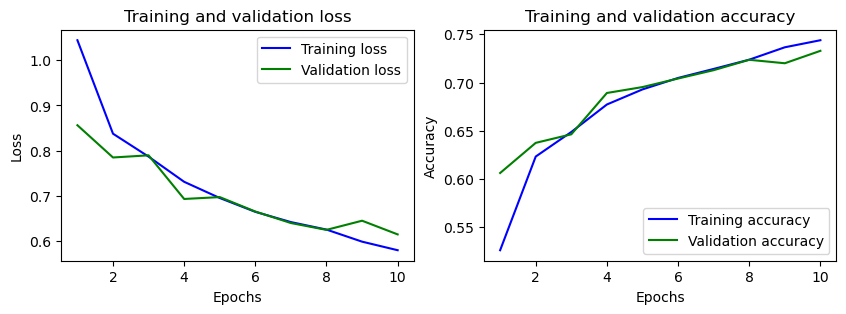

In [25]:
plt.figure(figsize=[10,3])
plt.subplot(121); 

loss = history_ages1.history['loss']
val_loss = history_ages1.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122); 

acc = history_ages1.history['accuracy']
val_acc = history_ages1.history['val_accuracy']
epochs = range(1, len(loss)+1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy' )
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [26]:
from sklearn.metrics import classification_report

In [27]:
test_pred = network_ages1.predict(test_data)

119/119 [==============================] - 29s 242ms/step


In [28]:
test_pred_bool = np.argmax(test_pred, axis=1)
test_pred_bool

array([2, 2, 3, ..., 2, 2, 2], dtype=int64)

In [29]:
from sklearn.metrics import classification_report
print(classification_report(test_data.classes,test_pred_bool,target_names=['0','1','2','3']))

              precision    recall  f1-score   support

           0       0.16      0.15      0.15       513
           1       0.37      0.36      0.37      1419
           2       0.37      0.40      0.38      1445
           3       0.10      0.08      0.09       417

    accuracy                           0.32      3794
   macro avg       0.25      0.25      0.25      3794
weighted avg       0.31      0.32      0.31      3794

